# EDA
## Vivienda en Madrid

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

pd.set_option('display.max_columns', None)

In [159]:
data = pd.read_csv('houses_Madrid.csv', index_col='Unnamed: 0')
data = data.sort_index(axis= 1)

Eliminación de las columnas que son nulas o no aportan información relevante al análisis

In [160]:
data.columns

Index(['are_pets_allowed', 'built_year', 'buy_price', 'buy_price_by_area',
       'door', 'energy_certificate', 'floor', 'has_ac', 'has_balcony',
       'has_central_heating', 'has_fitted_wardrobes', 'has_garden',
       'has_green_zones', 'has_individual_heating', 'has_lift', 'has_parking',
       'has_pool', 'has_private_parking', 'has_public_parking',
       'has_storage_room', 'has_terrace', 'house_type_id', 'id',
       'is_accessible', 'is_buy_price_known', 'is_exact_address_hidden',
       'is_exterior', 'is_floor_under', 'is_furnished', 'is_kitchen_equipped',
       'is_new_development', 'is_orientation_east', 'is_orientation_north',
       'is_orientation_south', 'is_orientation_west',
       'is_parking_included_in_price', 'is_renewal_needed',
       'is_rent_price_known', 'latitude', 'longitude', 'n_bathrooms',
       'n_floors', 'n_rooms', 'neighborhood_id', 'operation', 'parking_price',
       'portal', 'raw_address', 'rent_price', 'rent_price_by_area',
       'sq_mt_allot

In [161]:
def nombre_columnas(df):
    '''Función para tratar el nombre de las columnas y eliminar las vacias'''
    try:
        df.drop(columns=['latitude', 'longitude', 'portal', 'door', 'rent_price_by_area', 'are_pets_allowed', 'is_furnished',
                    'is_kitchen_equipped', 'has_private_parking', 'has_public_parking', 'sq_mt_useful', 'n_floors', 'has_ac', 'title',
                    'sq_mt_allotment', 'raw_address', 'is_exact_address_hidden', 'street_name', 'street_number', 'is_buy_price_known',
                    'is_parking_included_in_price', 'is_rent_price_known', 'operation', 'is_new_development', 'parking_price', 'rent_price', 'id', 'neighborhood_id',
                    'has_central_heating', 'has_individual_heating', 'has_lift', 'is_orientation_east', 'is_orientation_north', 'is_orientation_south', 'is_orientation_west'
                    ], axis=1, inplace = True)
        
        df.columns = ['annio_construccion', 'precio_compra', 'precio_compra_por_area', 'cee',
       'piso', 'balcon', 'armarios_empotrados', 'jardin', 'zonas_verdes', 
       'estacionamiento', 'pileta',
       'trastero', 'terraza', 'tipo_inmueble',
       'accesible', 'exterior', 'bajo', 'necesita_reforma', 'bannos', 'habitaciones',
        'metros_cuadrados', 'ubicacion']

    except Exception as a:
        print(f"No pude tranformar las columnas por {a}")
    return df

In [162]:
df = nombre_columnas(data)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21742 entries, 0 to 21741
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   annio_construccion      10000 non-null  float64
 1   precio_compra           21742 non-null  int64  
 2   precio_compra_por_area  21742 non-null  int64  
 3   cee                     21742 non-null  object 
 4   piso                    19135 non-null  object 
 5   balcon                  3321 non-null   object 
 6   armarios_empotrados     13399 non-null  object 
 7   jardin                  1556 non-null   object 
 8   zonas_verdes            4057 non-null   object 
 9   estacionamiento         21742 non-null  bool   
 10  pileta                  5171 non-null   object 
 11  trastero                7698 non-null   object 
 12  terraza                 9548 non-null   object 
 13  tipo_inmueble           21351 non-null  object 
 14  accesible               4074 non-null   obj

In [164]:
df.describe(include = 'all')

,annio_construccion,precio_compra,precio_compra_por_area,cee,piso,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,bannos,habitaciones,metros_cuadrados,ubicacion
count,10000.000000,2.174200e+04,21742.000000,21742,19135,3321,13399,1556,4057,21742,5171,7698,9548,21351,4074,18699,20572,21742,21726.000000,21742.000000,21616.000000,21742
unique,NaN,NaN,NaN,10,19,1,1,1,1,2,1,1,1,4,1,2,2,2,NaN,NaN,NaN,146
top,NaN,NaN,NaN,en trámite,1,True,True,True,True,False,True,True,True,HouseType 1: Pisos,True,True,False,False,NaN,NaN,NaN,"Chamartín, Madrid"
freq,NaN,NaN,NaN,10937,4440,3321,13399,1556,4057,14023,5171,7698,9548,17705,4074,16922,18033,17747,NaN,NaN,NaN,851
mean,1970.046400,6.537356e+05,4020.523871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.091687,3.005749,146.920892,NaN
std,69.386705,7.820821e+05,1908.418774,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.406992,1.510497,134.181865,NaN
min,1723.000000,3.600000e+04,447.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,13.000000,NaN
25%,1957.000000,1.980000e+05,2551.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,70.000000,NaN
50%,1970.000000,3.750000e+05,3720.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,3.000000,100.000000,NaN
75%,1994.000000,7.636000e+05,5000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,4.000000,162.000000,NaN


In [165]:
df_cardin = pd.DataFrame([{
    'variable' : i,
    'tipo_dato' : df[i].dtypes,
    'cantidad_de_nulos' : df[i].isna().sum(),
    'valores_unicos' : df[i].unique(),
    'porcentaje_cardinalidad' : (df[i].nunique()/df.shape[0])*100
} for i in df])

In [166]:
df_tipo_variable = pd.DataFrame({'tipo_variable' : ['discreta', 'continua', 'continua', 'ordinal',
       'ordinal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'nominal',
       'nominal', 'nominal', 'nominal', 'nominal', 'discreta',
       'discreta', 'continua', 'nominal']})

In [167]:
df_cardinalidad = pd.concat([df_cardin,df_tipo_variable], axis = 1)

In [168]:
df_cardinalidad

,variable,tipo_dato,cantidad_de_nulos,valores_unicos,porcentaje_cardinalidad,tipo_variable
0,annio_construccion,float64,11742,"[1960.0, nan, 1955.0, 2003.0, 1981.0, 1950.0, ...",0.712906,discreta
1,precio_compra,int64,0,"[85000, 129900, 144247, 109900, 260000, 195000...",11.052341,continua
2,precio_compra_por_area,int64,0,"[1328, 1856, 1535, 1717, 2407, 1548, 1583, 158...",25.954374,continua
3,cee,object,0,"[D, en trámite, no indicado, F, E, inmueble ex...",0.045994,ordinal
4,piso,object,2607,"[3, 4, 1, Bajo, 2, nan, 7, 6, Semi-sótano, 5, ...",0.087388,ordinal
5,balcon,object,18421,"[nan, True]",0.004599,nominal
6,armarios_empotrados,object,8343,"[nan, True]",0.004599,nominal
7,jardin,object,20186,"[nan, True]",0.004599,nominal
8,zonas_verdes,object,17685,"[nan, True]",0.004599,nominal
9,estacionamiento,bool,0,"[False, True]",0.009199,nominal


## Analisis Univariante

In [169]:
# COLORES
color_g = '#E67E22'
media_color = 'r'
mediana_color = 'b'

##### Variables Cuantitativas

In [170]:
df_cuant = df.select_dtypes(include = 'number')
df_cuant.describe().round()

,annio_construccion,precio_compra,precio_compra_por_area,bannos,habitaciones,metros_cuadrados
count,10000.0,21742.0,21742.0,21726.0,21742.0,21616.0
mean,1970.0,653736.0,4021.0,2.0,3.0,147.0
std,69.0,782082.0,1908.0,1.0,2.0,134.0
min,1723.0,36000.0,447.0,1.0,0.0,13.0
25%,1957.0,198000.0,2551.0,1.0,2.0,70.0
50%,1970.0,375000.0,3720.0,2.0,3.0,100.0
75%,1994.0,763600.0,5000.0,2.0,4.0,162.0
max,8170.0,8800000.0,18889.0,16.0,24.0,999.0


In [171]:
def graficos_variables_cuant(data):
    ''''Funcuion para graficar las variables cuantitativas'''
    try:
        for columna in data.columns:
            print('--'*30)
            print(f"VARIABLE: {columna}\n")

            media = data[columna].mean()
            mediana = data[columna].median()

            plt.figure(figsize=(20,4))
            sns.boxplot(data[columna], orient='h', color = color_g)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1)
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1)

            plt.show()

            sns.displot(data[columna], rug = True, color = color_g, bins = 30)
            plt.axvline(media, color = media_color, linestyle = 'dashed', linewidth = 1, label = f'Media: {media:.0f}')
            plt.axvline(mediana, color = mediana_color, linestyle = 'dashed', linewidth = 1, label = f'Mediana: {mediana:.0f}')

            plt.title(f'Distribución de {columna}')
            plt.legend()

            plt.show()

            print(data[columna].describe())
            print('--'*30)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

------------------------------------------------------------
VARIABLE: annio_construccion



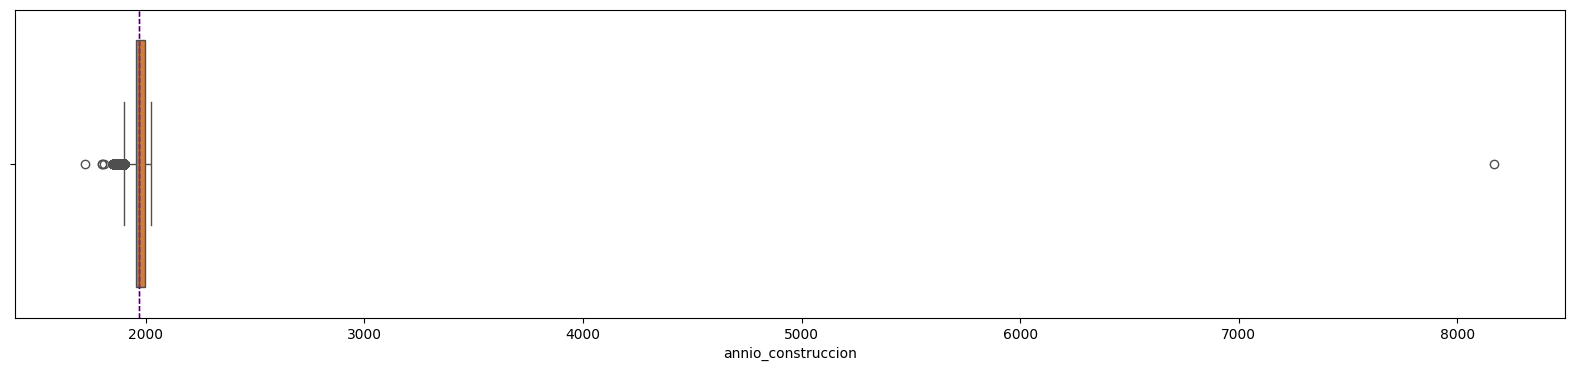

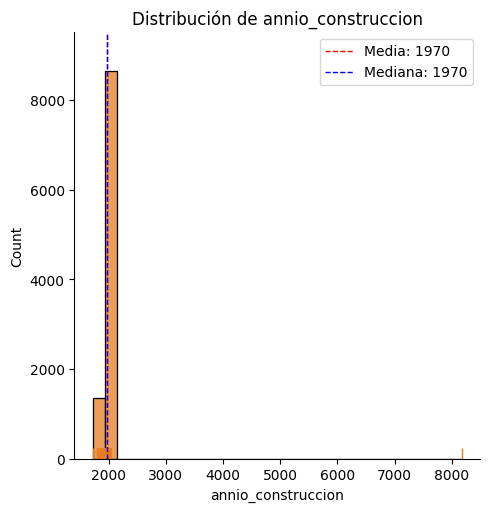

count    10000.000000
mean      1970.046400
std         69.386705
min       1723.000000
25%       1957.000000
50%       1970.000000
75%       1994.000000
max       8170.000000
Name: annio_construccion, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: precio_compra



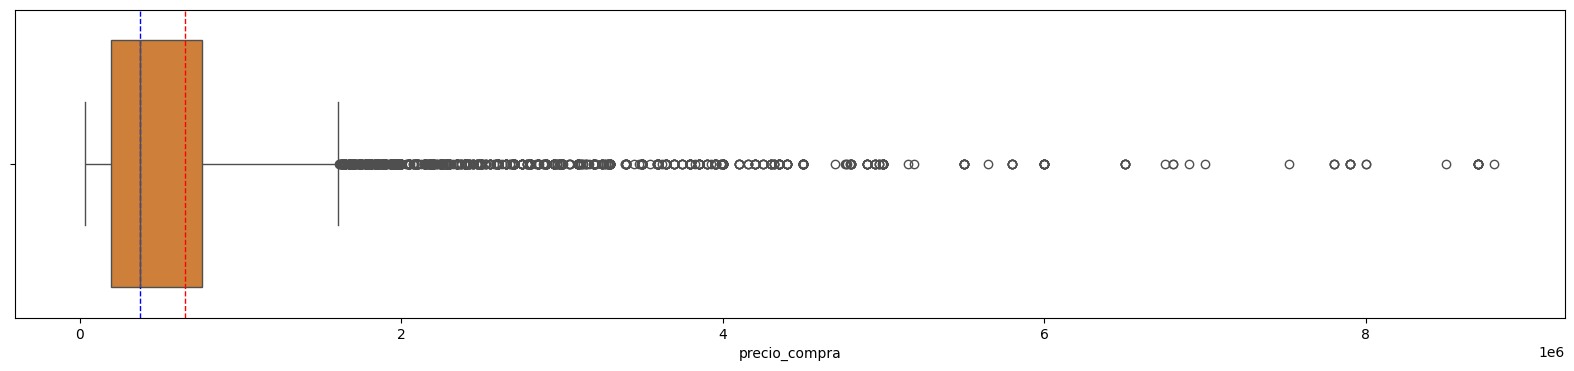

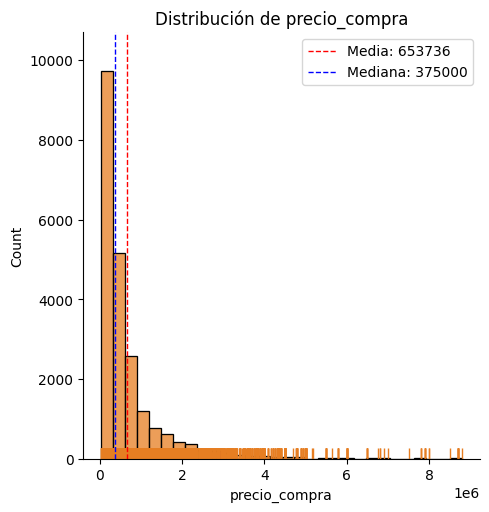

count    2.174200e+04
mean     6.537356e+05
std      7.820821e+05
min      3.600000e+04
25%      1.980000e+05
50%      3.750000e+05
75%      7.636000e+05
max      8.800000e+06
Name: precio_compra, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: precio_compra_por_area



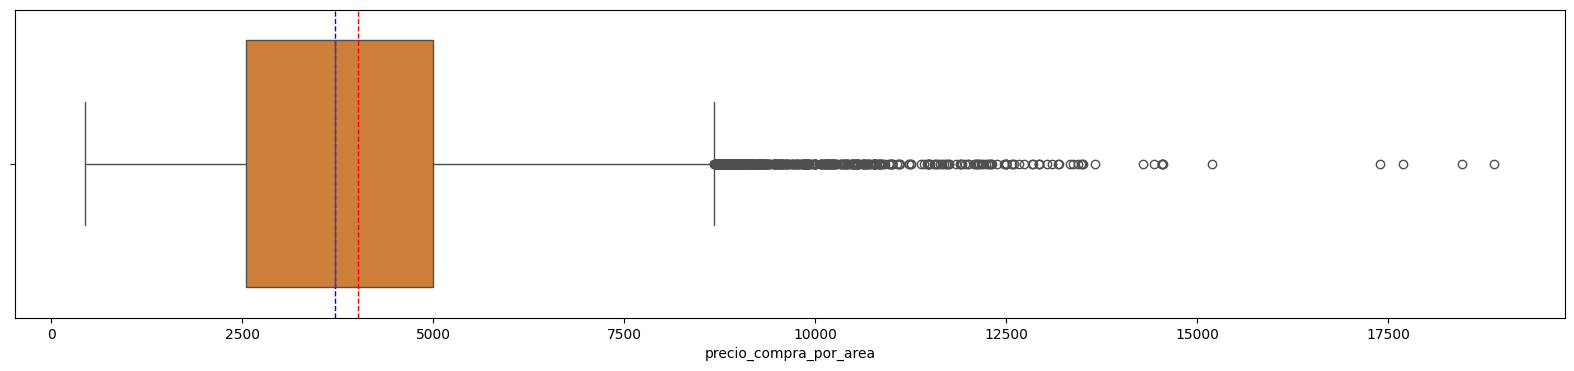

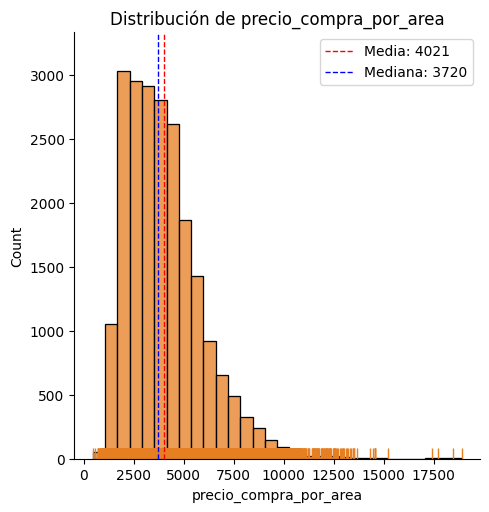

count    21742.000000
mean      4020.523871
std       1908.418774
min        447.000000
25%       2551.000000
50%       3720.000000
75%       5000.000000
max      18889.000000
Name: precio_compra_por_area, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: bannos



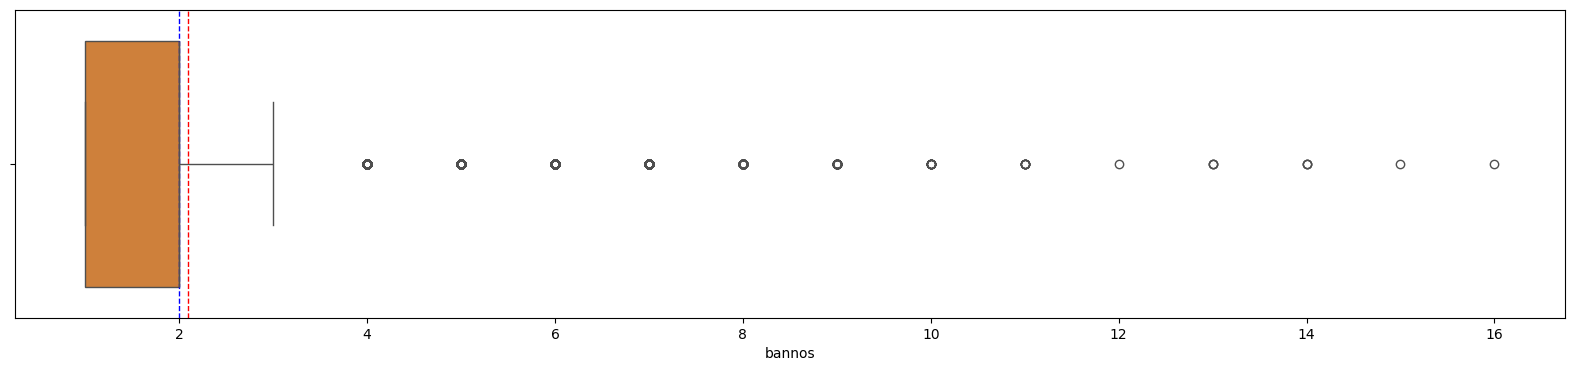

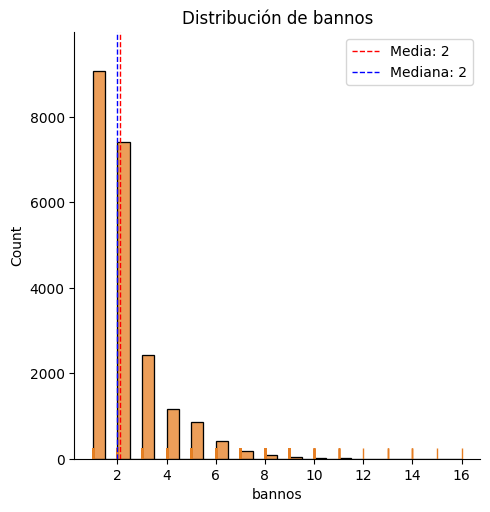

count    21726.000000
mean         2.091687
std          1.406992
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         16.000000
Name: bannos, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: habitaciones



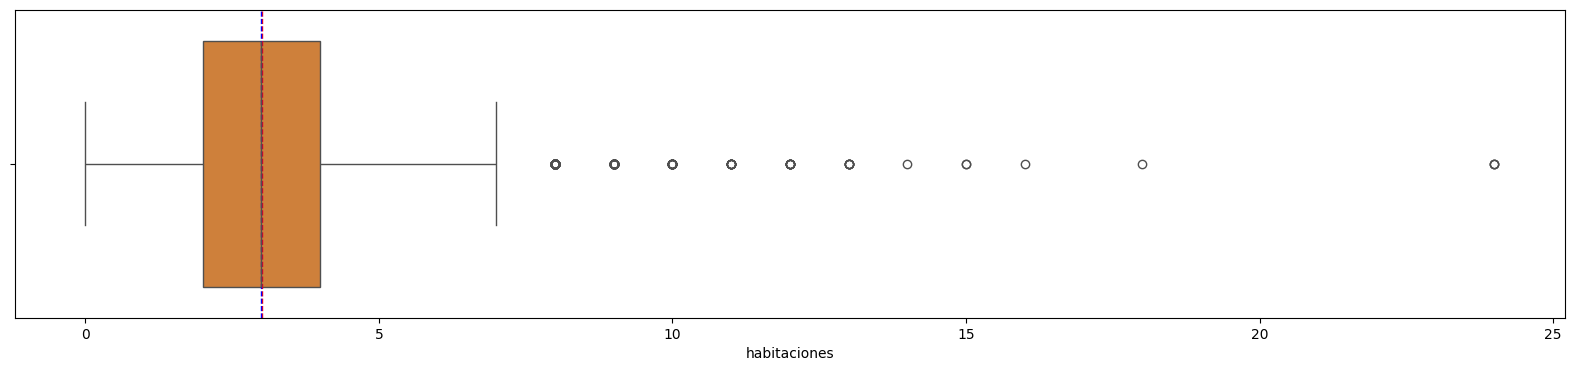

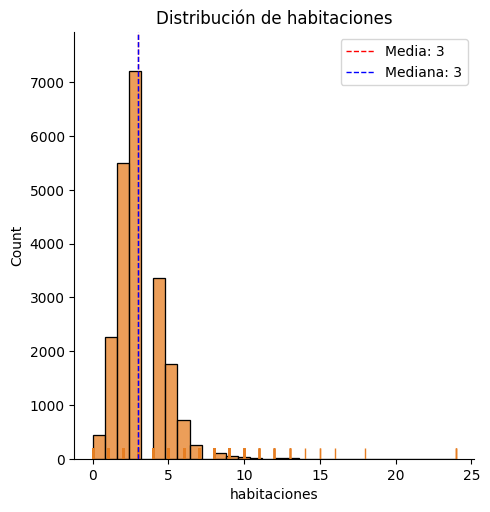

count    21742.000000
mean         3.005749
std          1.510497
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         24.000000
Name: habitaciones, dtype: float64
------------------------------------------------------------
------------------------------------------------------------
VARIABLE: metros_cuadrados



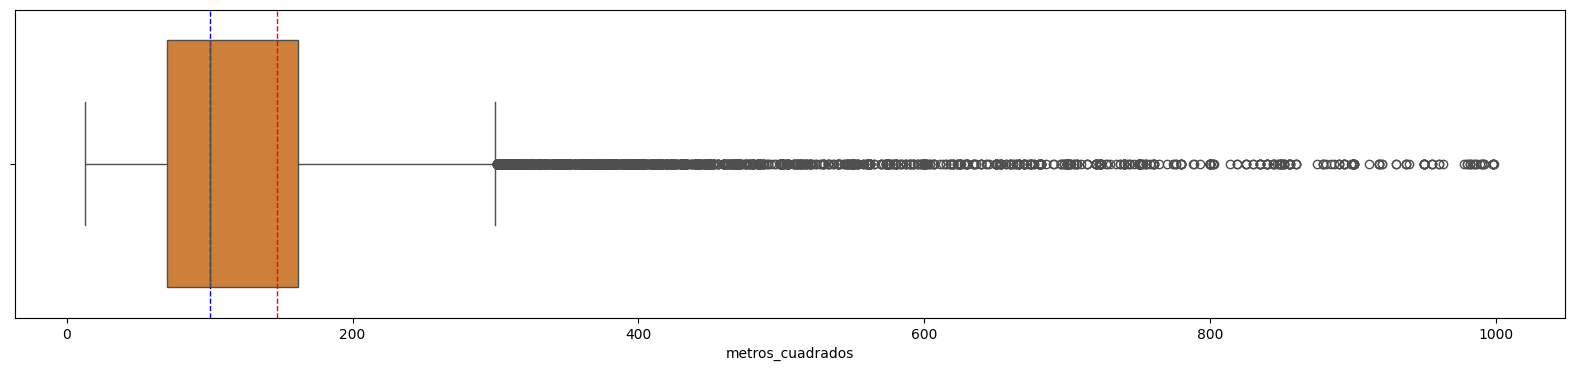

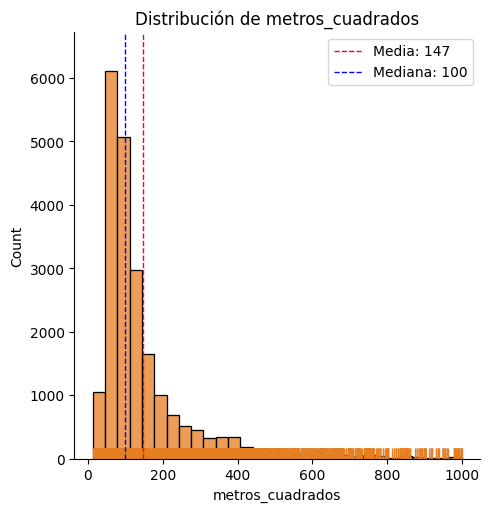

count    21616.000000
mean       146.920892
std        134.181865
min         13.000000
25%         70.000000
50%        100.000000
75%        162.000000
max        999.000000
Name: metros_cuadrados, dtype: float64
------------------------------------------------------------


In [172]:
graficos_variables_cuant(df_cuant)

##### Variables Cualitativas

In [173]:
df_cual = df.select_dtypes(exclude= 'number')

In [174]:
def graficos_variables_cualit(data):
    ''''Funcuion para graficar las variables cualitativas'''
    try:
        for columna in data.columns:
            print('--'*50)
            print(f"VARIABLE: {columna}\n")
            if len(df[columna].dropna().unique()) > 1:
                ax = sns.countplot(data= data.sort_values(by=columna), x= columna, color = color_g)
                ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)
                #se superponen los valores porque me da uns advertencia al aplicar este parametro, no sé como sacarla :)
                plt.title(f"Conteo variable {columna}")
                plt.show();
            else:
                print('No es necesario graficar porque tiene un solo valor dentro de la columna')
            print(data[columna].value_counts())
            print('--'*50)
    except Exception as a:
        print(f"No puedo analizar la variable por este error {a}")

----------------------------------------------------------------------------------------------------
VARIABLE: cee



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_3972\3687421204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


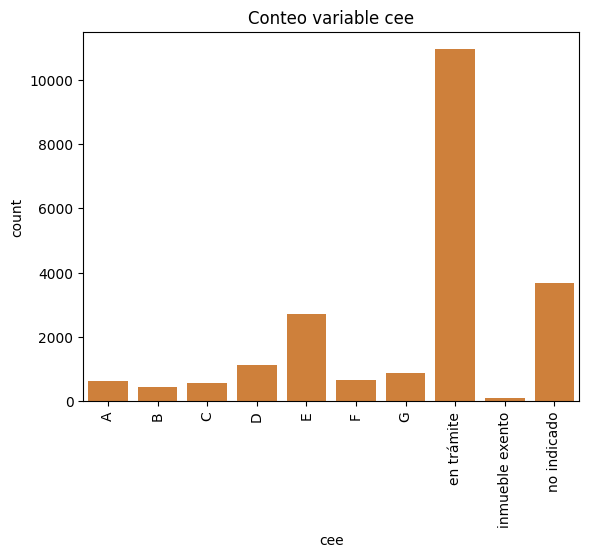

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_3972\3687421204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


cee
en trámite         10937
no indicado         3669
E                   2701
D                   1121
G                    894
F                    674
A                    618
C                    580
B                    452
inmueble exento       96
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: piso



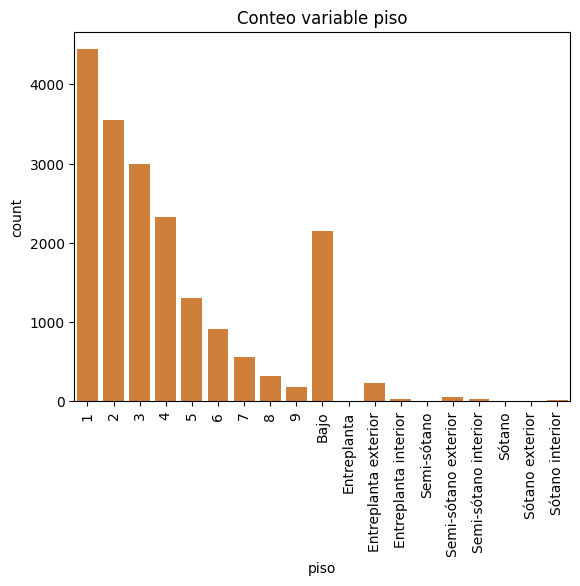

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_3972\3687421204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


piso
1                       4440
2                       3546
3                       3001
4                       2323
Bajo                    2144
5                       1310
6                        913
7                        556
8                        326
Entreplanta exterior     236
9                        181
Semi-sótano exterior      55
Semi-sótano interior      36
Entreplanta interior      32
Sótano interior           23
Sótano                     5
Sótano exterior            4
Entreplanta                3
Semi-sótano                1
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: balcon

No es necesario graficar porque tiene un solo valor dentro de la columna
balcon
True    3321
Name: count, dtype: int64
-------------------------------------------------------------------------------

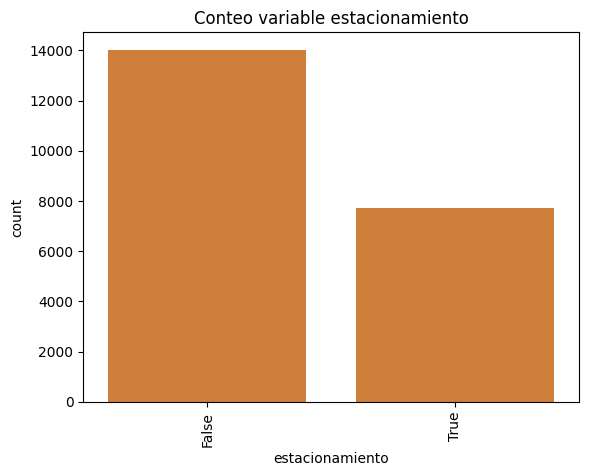

estacionamiento
False    14023
True      7719
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: pileta

No es necesario graficar porque tiene un solo valor dentro de la columna
pileta
True    5171
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: trastero

No es necesario graficar porque tiene un solo valor dentro de la columna
trastero
True    7698
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: terraza

No es necesario graficar 

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_3972\3687421204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


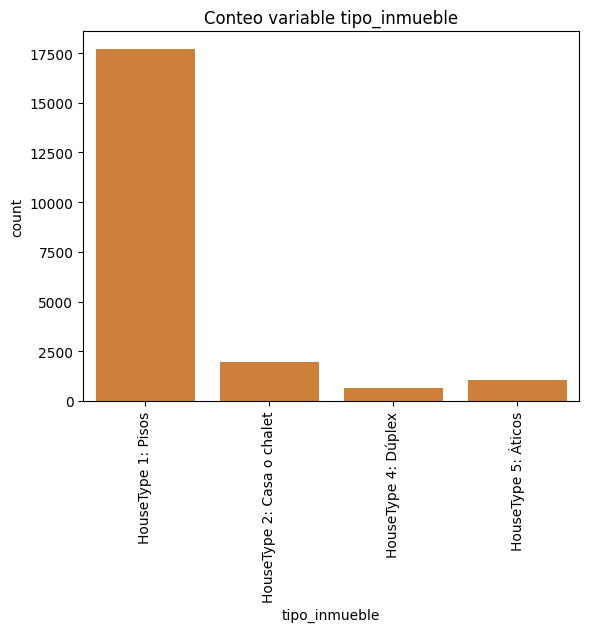

C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_3972\3687421204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


tipo_inmueble
HouseType 1: Pisos            17705
HouseType 2: Casa o chalet     1938
HouseType 5: Áticos            1032
HouseType 4: Dúplex             676
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: accesible

No es necesario graficar porque tiene un solo valor dentro de la columna
accesible
True    4074
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: exterior



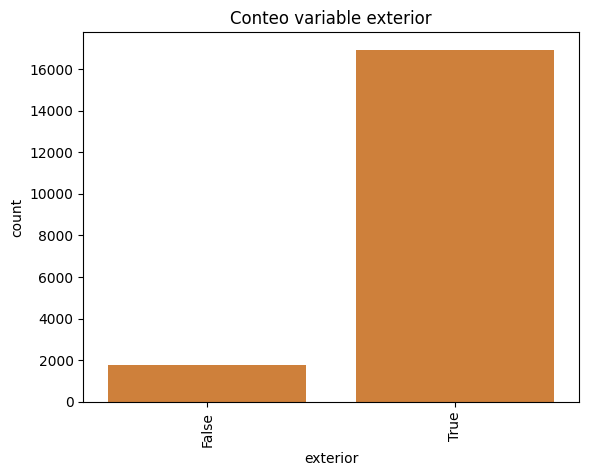

exterior
True     16922
False     1777
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: bajo



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_3972\3687421204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


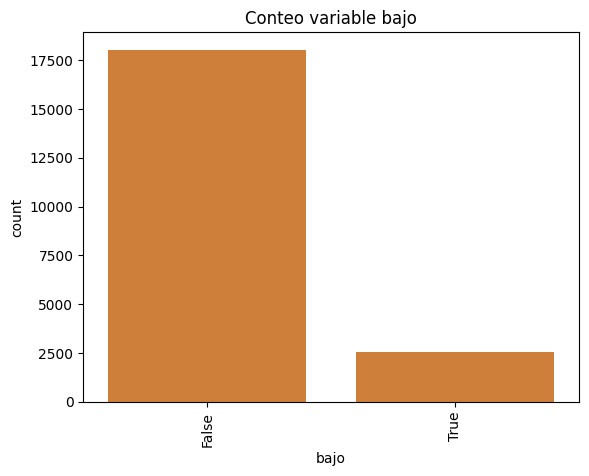

bajo
False    18033
True      2539
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: necesita_reforma



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_3972\3687421204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


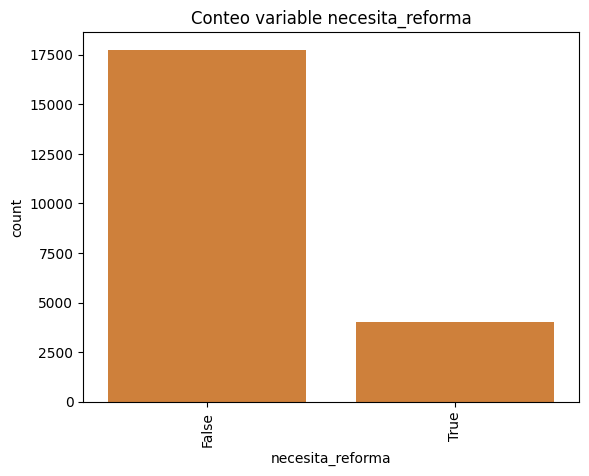

necesita_reforma
False    17747
True      3995
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
VARIABLE: ubicacion



C:\Users\Mega Tecnologia\AppData\Local\Temp\ipykernel_3972\3687421204.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df[columna].sort_values().unique(), rotation=90)


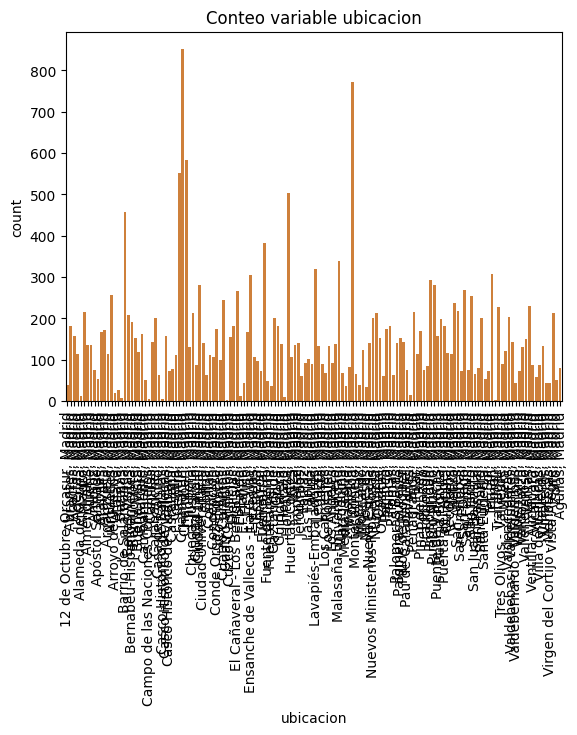

ubicacion
Chamartín, Madrid                           851
Moncloa, Madrid                             771
Chamberí, Madrid                            583
Centro, Madrid                              552
Hortaleza, Madrid                           503
                                           ... 
Barajas, Madrid                               7
Campo de las Naciones-Corralejos, Madrid      6
Casco Histórico de Barajas, Madrid            5
Timón, Madrid                                 4
Cuatro Vientos, Madrid                        2
Name: count, Length: 146, dtype: int64
----------------------------------------------------------------------------------------------------


In [175]:
graficos_variables_cualit(df_cual)

## Limpieza de datos

In [176]:
def rellenar_columnas_F(data):
    ''' Función que rellena las columnas que tienen valor true y nan'''
    try:
        df['zonas_verdes'].replace(np.nan, False,inplace=True)
        df['balcon'].replace(np.nan, False,inplace=True)
        df['armarios_empotrados'].replace(np.nan, False,inplace=True)
        df['jardin'].replace(np.nan, False,inplace=True)
        df['pileta'].replace(np.nan, False,inplace=True)
        df['trastero'].replace(np.nan, False,inplace=True)
        df['terraza'].replace(np.nan, False,inplace=True)
        df['accesible'].replace(np.nan, False,inplace=True)
    except Exception as a:
        print(f"No pude rellenar las columnas por {a}")
    return data

In [177]:
df = rellenar_columnas_F(df)

In [178]:
def rellenar_annios_nulos_necesitan_reforma(df):
    '''Función para rellenar los annios que vienen nulos'''
    try:
        #diccionario para ver si tenemos todos las ubicaciones o no
        dicc_annios_antiguos = df[(df['necesita_reforma'] == True) & (df['annio_construccion'].notna())].groupby('ubicacion')[['annio_construccion']].mean(numeric_only = True).astype(int).reset_index().to_dict('records')
        
        #agrega las ubicaciones que no existen, asignando la media de los inmuebles que necesitan reforma
        dicc_annios_antiguos = dicc_annios_antiguos + [{'ubicacion': 'Horcajo, Madrid', 'annio_construccion': 1957}, 
                   {'ubicacion': 'Valdebebas - Valdefuentes, Madrid', 'annio_construccion': 1957},
                   {'ubicacion': 'Virgen del Cortijo - Manoteras, Madrid', 'annio_construccion': 1957}]
        
        df_annios_antiguos = pd.DataFrame(dicc_annios_antiguos)
        df_unido = pd.merge(df,df_annios_antiguos, on='ubicacion', how = 'left')

        #asigna el valor de el annio en base a la la ubicacion
        df_unido['annio_construccion'] = df_unido.apply(lambda x: x.annio_construccion_y if ((x.necesita_reforma == True) & (pd.isna(x.annio_construccion_x))) else x.annio_construccion_x, axis = 1)

        df = df_unido.drop(columns=['annio_construccion_y', 'annio_construccion_x'], axis = 1)
    
    except Exception as a:
        print(f"No pude transformar el df por {a}")

    return df


In [179]:
def rellenar_annios_nulos_no_necesitan_reforma(df):
    '''Función para rellenar los annios que vienen nulos'''
    try:
        #diccionario para ver si tenemos todos las ubicaciones o no
        dicc_annios_nuevo = df[(df['necesita_reforma'] == False) & (df['annio_construccion'].notna())].groupby('ubicacion')[['annio_construccion']].mean(numeric_only = True).astype(int).reset_index().to_dict('records')
        
        #agrega las ubicaciones que no existen, asignando la media de los inmuebles que no necesitan reforma
        dicc_annios_nuevo = dicc_annios_nuevo + [{'ubicacion': 'Cuatro Vientos, Madrid', 'annio_construccion': 1973}]
        
        df_annios_nuevo = pd.DataFrame(dicc_annios_nuevo)
        df_unido_nuevo = pd.merge(df,df_annios_nuevo, on='ubicacion', how='left')

        #asigna el valor de el annio en base a la la ubicacion
        df_unido_nuevo['annio_construccion'] = df_unido_nuevo.apply(lambda x: x.annio_construccion_y if ((x.necesita_reforma == False) & (pd.isna(x.annio_construccion_x))) else x.annio_construccion_x, axis = 1)

        df = df_unido_nuevo.drop(columns=['annio_construccion_x', 'annio_construccion_y'], axis = 1)
    
    except Exception as a:
        print(f"No pude transformar el df por {a}")

    return df

In [180]:
media_año_barrio_s = df[(df['ubicacion'] == 'Barrio de Salamanca, Madrid') & (df['annio_construccion'].notna())].groupby('ubicacion')['annio_construccion'].mean(numeric_only = True).astype(int)
media_año_barrio_s

ubicacion
Barrio de Salamanca, Madrid    1979
Name: annio_construccion, dtype: int32

In [181]:
df['annio_construccion'].replace(8170.0, 1979, inplace= True)

In [182]:
def rellenar_pisos_nulos(df):
    '''Funcion para rellenar los valores nulos de los pisos, con la moda segun la ubicacion'''
    try:
        #df el piso que más se repite, respetando las alturas por ubicacion segun normativa
        df_piso_más_comun = df[df['piso'].notna()].groupby(['ubicacion', 'piso'], as_index=False).count()[['ubicacion', 'piso']].groupby('ubicacion', as_index=False).max()

        df_unido_pisos = pd.merge(df,df_piso_más_comun, on='ubicacion', how= 'inner')

        df_unido_pisos['piso'] = df_unido_pisos.apply(lambda x: x.piso_y if pd.isna(x.piso_x) else x.piso_x, axis = 1)

        df = df_unido_pisos.drop(columns=['piso_x', 'piso_y'], axis = 1)
    except Exception as a:
        print(f"No pude transformar el df por {a}")
    return df

In [183]:
def rellenar_bajos_nulos(df):
    '''Funcion que rellena los valores nulos en la columna bajo en base al piso en el que se encuentra'''
    try:
        bajos = ('Semi-sótano', 'Entreplanta interior', 'Entreplanta', 'Semi-sótano exterior', 'Semi-sótano interior', 'Sótano interior', 'Sótano', 'Sótano exterior')

        df['bajo'] = df['piso'].apply(lambda x: True if x in bajos else False)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return df

In [184]:
def sacar_metros_cuadrados_nuevos(df):
    ''''Funcion para rellenar los valores nulos de los metros cuadrados en base a el precio por metro cuadrado'''
    try:
        df.drop(columns=['metros_cuadrados'], axis= 1, inplace=True)
        df['metros_cuadrados'] = (df['precio_compra'] / df['precio_compra_por_area']).round()
    except Exception as a:
        print(f"No pude tranformar el dataframe")
    return df
    

In [185]:
def rellenar_exterior(df):
    '''Funcion que rellena los valores nulos en la columna exterior en base a el piso en el que se encuentra'''
    try:
        exteriores = ('Entreplanta exterior', 'Semi-sótano exterior', 'Sótano exterior')

        df['exterior'] = df['piso'].apply(lambda x: True if x in exteriores else False)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return df

In [186]:
def rellenar_tipo_inmueble(df):
    '''Funcion que rellena los valores nulos en la columna tipo_inmueble, los unico no completos son los estudios'''
    try:
        df['tipo_inmueble'].fillna(value ='HouseType 1: Pisos', inplace=True)

    except Exception as a:
        print(f"No puse tranformar el df por {a}")
    
    return df

In [187]:
def rellenar_bannos_nulos(df):
    '''Funcion para rellenar los valores nulos de los bannos, con la media segun los metros cuadrados'''
    try:
        dicc_bannos = df[df['bannos'].notna()].groupby(['metros_cuadrados'], as_index=False)[['bannos']].mean().round().to_dict('records')
        dicc_bannos.append({'metros_cuadrados': 661, 'bannos': 5})

        df_banno_mas_comun = pd.DataFrame(dicc_bannos)

        df_unido_bannos = pd.merge(df,df_banno_mas_comun, on='metros_cuadrados', how= 'inner')

        df_unido_bannos['bannos'] = df_unido_bannos.apply(lambda x: x.bannos_y if pd.isna(x.bannos_x) else x.bannos_x, axis = 1)

        df = df_unido_bannos.drop(columns=['bannos_x', 'bannos_y'], axis = 1)
    except Exception as a:
        print(f"No pude transformar el df por {a}")
    return df

In [188]:
df = rellenar_annios_nulos_necesitan_reforma(df)
df = rellenar_annios_nulos_no_necesitan_reforma(df)

In [189]:
df = rellenar_pisos_nulos(df)

In [190]:
df = rellenar_bajos_nulos(df)

In [191]:
df = sacar_metros_cuadrados_nuevos(df)

In [192]:
df = rellenar_exterior(df)

In [193]:
df = rellenar_tipo_inmueble(df)

In [194]:
df = rellenar_bannos_nulos(df)

In [195]:
for i in df:
    print(f"La cardinalidad de la variable {i} es {(df[i].nunique()/df.shape[0])*100:.2f} %")

La cardinalidad de la variable precio_compra es 11.05 %
La cardinalidad de la variable precio_compra_por_area es 25.95 %
La cardinalidad de la variable cee es 0.05 %
La cardinalidad de la variable balcon es 0.01 %
La cardinalidad de la variable armarios_empotrados es 0.01 %
La cardinalidad de la variable jardin es 0.01 %
La cardinalidad de la variable zonas_verdes es 0.01 %
La cardinalidad de la variable estacionamiento es 0.01 %
La cardinalidad de la variable pileta es 0.01 %
La cardinalidad de la variable trastero es 0.01 %
La cardinalidad de la variable terraza es 0.01 %
La cardinalidad de la variable tipo_inmueble es 0.02 %
La cardinalidad de la variable accesible es 0.01 %
La cardinalidad de la variable exterior es 0.01 %
La cardinalidad de la variable bajo es 0.01 %
La cardinalidad de la variable necesita_reforma es 0.01 %
La cardinalidad de la variable habitaciones es 0.09 %
La cardinalidad de la variable ubicacion es 0.67 %
La cardinalidad de la variable annio_construccion es 0

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21742 entries, 0 to 21741
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   precio_compra           21742 non-null  int64  
 1   precio_compra_por_area  21742 non-null  int64  
 2   cee                     21742 non-null  object 
 3   balcon                  21742 non-null  bool   
 4   armarios_empotrados     21742 non-null  bool   
 5   jardin                  21742 non-null  bool   
 6   zonas_verdes            21742 non-null  bool   
 7   estacionamiento         21742 non-null  bool   
 8   pileta                  21742 non-null  bool   
 9   trastero                21742 non-null  bool   
 10  terraza                 21742 non-null  bool   
 11  tipo_inmueble           21742 non-null  object 
 12  accesible               21742 non-null  bool   
 13  exterior                21742 non-null  bool   
 14  bajo                    21742 non-null

In [197]:
df_correlacion = df.select_dtypes(include= 'number').corr()

In [198]:
df_correlacion

,precio_compra,precio_compra_por_area,habitaciones,annio_construccion,metros_cuadrados,bannos
precio_compra,1.000000,0.519645,0.608893,-0.035410,0.804609,0.771973
precio_compra_por_area,0.519645,1.000000,0.031707,-0.312602,0.112110,0.238746
habitaciones,0.608893,0.031707,1.000000,0.047424,0.695939,0.727268
annio_construccion,-0.035410,-0.312602,0.047424,1.000000,0.112610,0.122715
metros_cuadrados,0.804609,0.112110,0.695939,0.112610,1.000000,0.837052
bannos,0.771973,0.238746,0.727268,0.122715,0.837052,1.000000


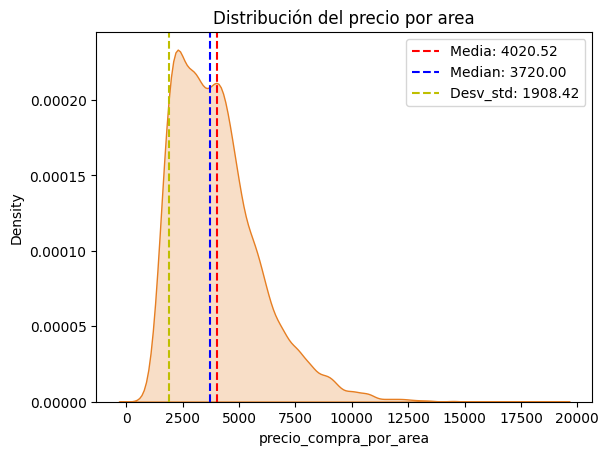

kurtosis: 2.15
simetria: 1.17
La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.
La distribución es asimétrica negativa (sesgo hacia la izquierda).


In [199]:
from scipy.stats import kurtosis, skew

media = df['precio_compra_por_area'].mean()
median = df['precio_compra_por_area'].median()
variance = df['precio_compra_por_area'].var()
desv_std = df['precio_compra_por_area'].std()  
kurtosis_valor = kurtosis(df['precio_compra_por_area'])
simetria_valor = skew(df['precio_compra_por_area'])

sns.kdeplot(data=df, x='precio_compra_por_area',fill=True,color=color_g,)
# Agregar líneas verticales para las estadísticas
plt.axvline(media, color=media_color, linestyle='dashed', label=f'Media: {media:.2f}')
plt.axvline(median, color= mediana_color, linestyle='dashed', label=f'Median: {median:.2f}')
plt.axvline(desv_std, color='y', linestyle='dashed', label=f'Desv_std: {desv_std:.2f}')

plt.title('Distribución del precio por area')
# plt.xlabel('Popularidad')
# plt.ylabel('Densidad')

plt.legend()

plt.show()
# Interpretación de los valores

print(f"kurtosis: {kurtosis_valor:.2f}")
print(f"simetria: {simetria_valor:.2f}")

if kurtosis_valor > 0:
    print("La distribución es leptocúrtica, lo que sugiere colas pesadas y picos agudos.")
elif kurtosis_valor < 0:
    print("La distribución es platicúrtica, lo que sugiere colas ligeras y un pico achatado.")
else:
    print("La distribución es mesocúrtica, similar a una distribución normal.")

if simetria_valor < 0:
    print("La distribución es asimétrica positiva (sesgo hacia la derecha).")
elif simetria_valor > 0:
    print("La distribución es asimétrica negativa (sesgo hacia la izquierda).")
else:
    print("La distribución es perfectamente simétrica alrededor de su media.")

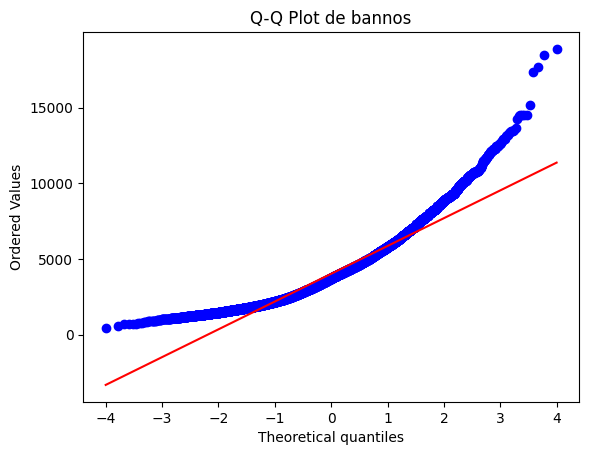

In [200]:
from scipy.stats import probplot
probplot(df['precio_compra_por_area'], dist="norm", plot=plt)
plt.title(f'Q-Q Plot de {i}')
plt.show()

In [201]:
df.head()

,precio_compra,precio_compra_por_area,cee,balcon,armarios_empotrados,jardin,zonas_verdes,estacionamiento,pileta,trastero,terraza,tipo_inmueble,accesible,exterior,bajo,necesita_reforma,habitaciones,ubicacion,annio_construccion,piso,metros_cuadrados,bannos
0,85000,1328,D,False,False,False,False,False,False,False,False,HouseType 1: Pisos,False,False,False,False,2,"San Cristóbal, Madrid",1960.0,3,64.0,1.0
1,72000,1125,F,False,False,False,False,False,False,False,True,HouseType 1: Pisos,False,False,False,False,3,"San Cristóbal, Madrid",1960.0,3,64.0,1.0
2,76000,1188,en trámite,False,False,False,False,False,False,False,False,HouseType 1: Pisos,False,False,False,True,3,"San Cristóbal, Madrid",1960.0,1,64.0,1.0
3,110000,1719,E,False,False,False,False,False,False,False,True,HouseType 1: Pisos,False,False,False,False,2,"San Cristóbal, Madrid",1968.0,2,64.0,1.0
4,104000,1625,en trámite,False,False,False,False,False,False,False,False,HouseType 1: Pisos,False,False,False,False,3,"Los Ángeles, Madrid",1969.0,5,64.0,1.0


In [202]:
df_cuant = df.select_dtypes(include = 'number')

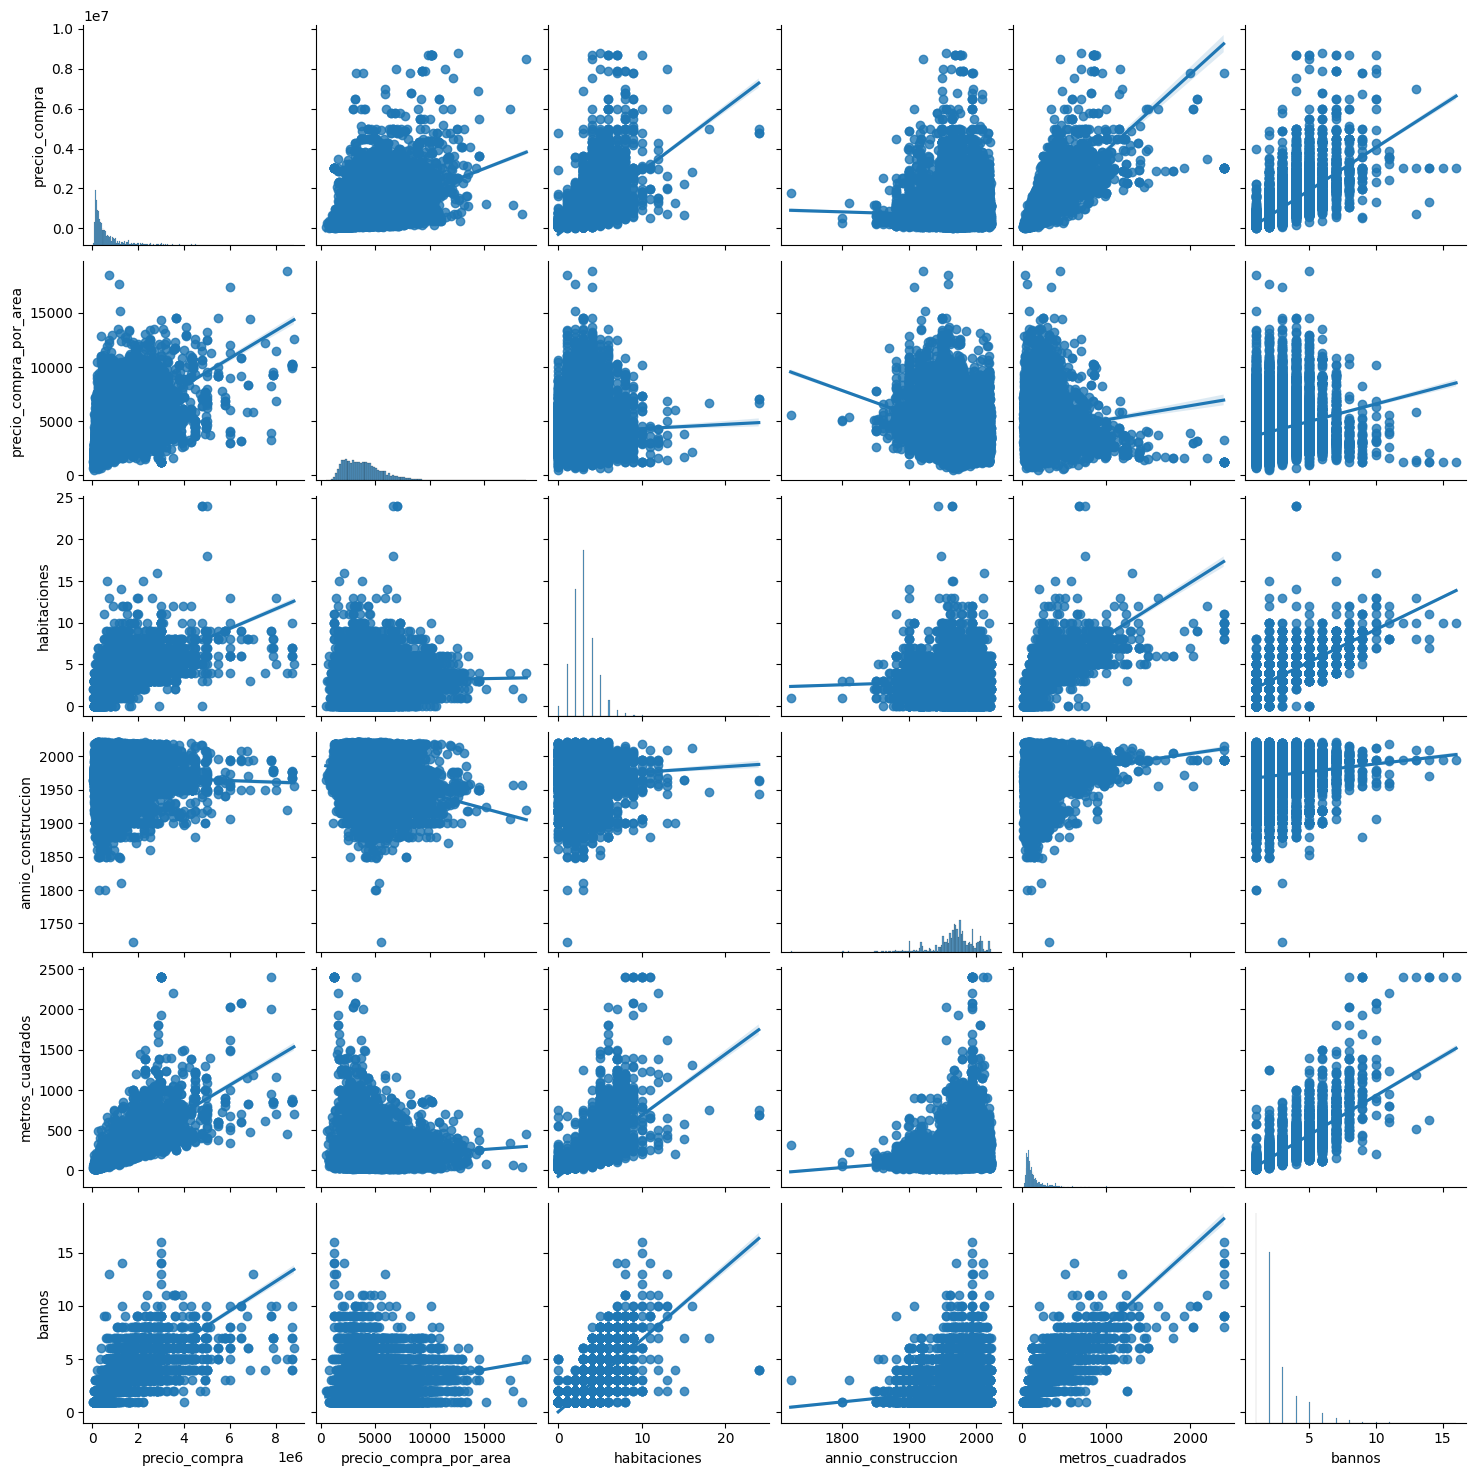

In [203]:
sns.pairplot(df_cuant, kind='reg')

In [210]:
plt.figure(figsize=(10, 6))
sns.regplot(x='habitaciones', y='precio_compra', data=df, marker='o')

# Añadir etiquetas y título
plt.xlabel('Número de Habitaciones')
plt.ylabel('Precio de la Vivienda')
plt.title('Relación entre Precio y Número de Habitaciones')

KeyError: 'habitaciones'

<Figure size 1000x600 with 0 Axes>

In [208]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bannos', y='precio_compra', data=df, marker='o')

# Añadir etiquetas y título
plt.xlabel('Número de Baños')
plt.ylabel('Precio de la Vivienda')
plt.title('Relación entre Precio y Número de Baños')

KeyError: 'bannos'

<Figure size 1000x600 with 0 Axes>

In [206]:
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import numpy as np

# Ejemplo de datos
datos = {
    'Ciudad': ['Ciudad A', 'Ciudad B', 'Ciudad C', 'Ciudad D'],
    'Latitud': [40.7128, 34.0522, 41.8781, 36.7783],
    'Longitud': [-74.0060, -118.2437, -87.6298, -119.4179],
    'Poblacion': [500000, 700000, 300000, 900000],
}

df = pd.DataFrame(datos)

# Crear un mapa con folium
mapa = folium.Map(location=[np.mean(df['Latitud']), np.mean(df['Longitud'])], zoom_start=4)

# Agregar burbujas al mapa
for i in range(len(df)):
    folium.CircleMarker(
        location=[df['Latitud'][i], df['Longitud'][i]],
        radius=df['Poblacion'][i] / 100000,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        popup=f"{df['Ciudad'][i]} - Población: {df['Poblacion'][i]}"
    ).add_to(mapa)

# Guardar el mapa como HTML
mapa.save('bubble_map.html')